# Analyse exploratoire de la base de données Deep Lesion

## 0- Import des librairies

In [139]:
import os, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats
from skimage.io import imread

In [140]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from glob import glob

## 1- Chargement et vue globale des méta données DL_info

In [141]:
data = pd.read_csv('//ontap-vserver01/DataLake/DK-lake/raw/DeepLesion/DL_info.csv')

In [142]:
print(data.shape[0], 'images au total')

32735 images au total


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   File_name                   32735 non-null  object 
 1   Patient_index               32735 non-null  int64  
 2   Study_index                 32735 non-null  int64  
 3   Series_ID                   32735 non-null  int64  
 4   Key_slice_index             32735 non-null  int64  
 5   Measurement_coordinates     32735 non-null  object 
 6   Bounding_boxes              32735 non-null  object 
 7   Lesion_diameters_Pixel_     32735 non-null  object 
 8   Normalized_lesion_location  32735 non-null  object 
 9   Coarse_lesion_type          32735 non-null  int64  
 10  Possibly_noisy              32735 non-null  int64  
 11  Slice_range                 32735 non-null  object 
 12  Spacing_mm_px_              32735 non-null  object 
 13  Image_size                  327

In [144]:
data.head()

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3


Description des variables

In [12]:
data.describe(include='all')

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
count,32735,32735.000000,32735.000000,32735.000000,32735.000000,32735,32735,32735,32735,32735.000000,32735.000000,32735,32735,32735,32735,32735,32734.000000,32735.000000
unique,32120,NaN,NaN,NaN,NaN,32735,32735,32729,32735,NaN,NaN,6239,831,3,55,2,NaN,NaN
top,002824_02_01_144.png,NaN,NaN,NaN,NaN,"346.658, 355.223, 341.764, 317.292, 362.565, 3...","95.2943, 184.074, 147.449, 245.171","12.2095, 11.6845","0.55787, 0.711806, 0.475898",NaN,NaN,"16, 28","0.816406, 0.816406, 5","512, 512","-175, 275",M,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,1,1,2,1,NaN,NaN,114,1688,32695,24839,18151,NaN,NaN
mean,NaN,1882.226516,3.058592,1.300168,132.518803,NaN,NaN,NaN,NaN,0.564381,0.001069,NaN,NaN,NaN,NaN,NaN,52.964991,1.450374
std,NaN,1267.939787,2.750793,0.544712,125.103756,NaN,NaN,NaN,NaN,2.613362,0.032682,NaN,NaN,NaN,NaN,NaN,16.385262,0.740660
min,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,727.000000,1.000000,1.000000,51.000000,NaN,NaN,NaN,NaN,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,43.000000,1.000000
50%,NaN,1736.000000,2.000000,1.000000,85.000000,NaN,NaN,NaN,NaN,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,56.000000,1.000000
75%,NaN,2965.000000,4.000000,2.000000,176.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,65.000000,2.000000


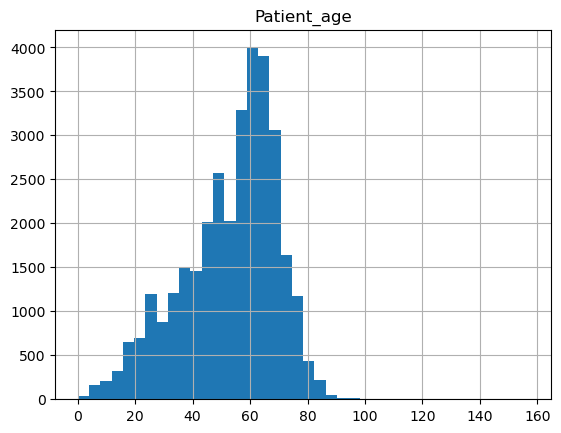

In [379]:
data.hist('Patient_age',bins=40)
plt.show()

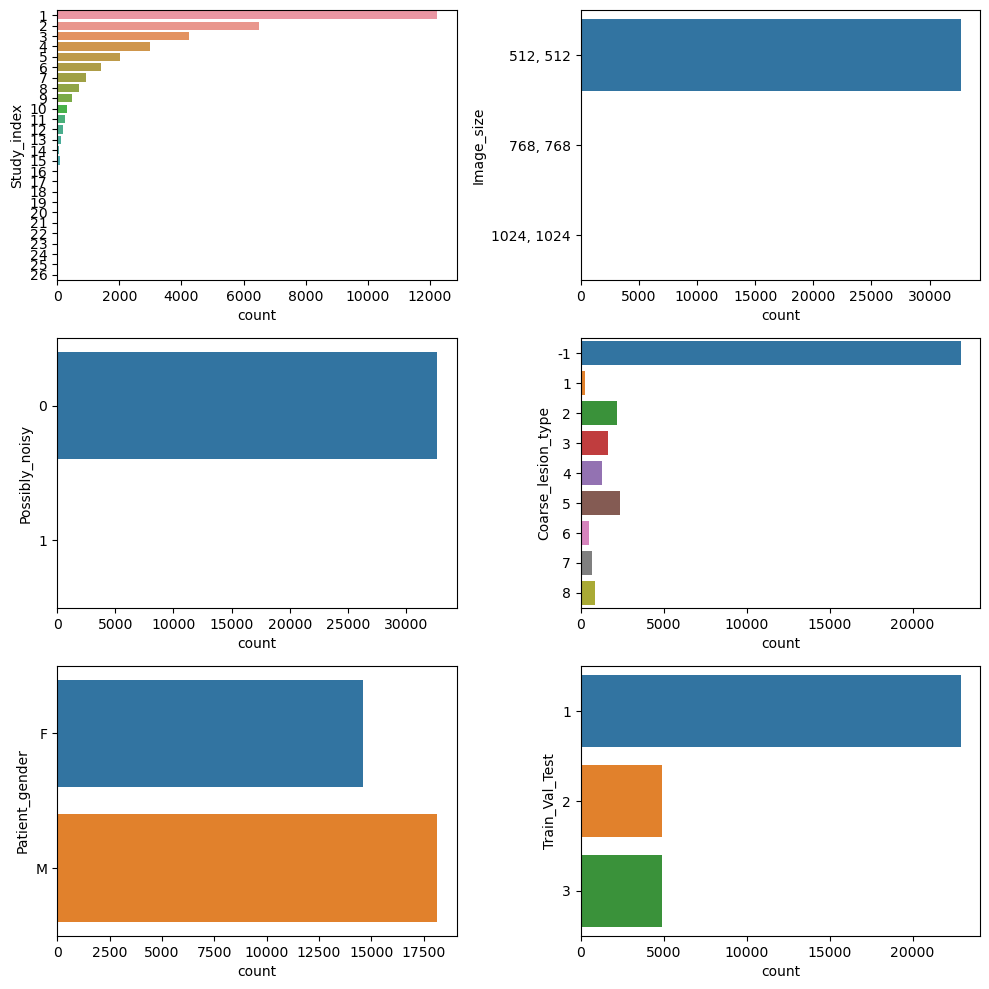

In [6]:
fig, axes = plt.subplots(3,2,figsize=(10,10)) 
columns = ['Study_index','Image_size','Possibly_noisy','Coarse_lesion_type','Patient_gender', 'Train_Val_Test']
for i,col in enumerate(list(columns)):
    plot = sns.countplot(y=col, data=data, ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

In [48]:
data.isnull().sum(axis=0)

File_name                     0
Patient_index                 0
Study_index                   0
Series_ID                     0
Key_slice_index               0
Measurement_coordinates       0
Bounding_boxes                0
Lesion_diameters_Pixel_       0
Normalized_lesion_location    0
Coarse_lesion_type            0
Possibly_noisy                0
Slice_range                   0
Spacing_mm_px_                0
Image_size                    0
DICOM_windows                 0
Patient_gender                0
Patient_age                   1
Train_Val_Test                0
image_path                    0
dtype: int64

### Description de la base:

Au total nous avons __4427 patients__ ayant participé à __26 études distinctes__. __10594 images__ ont été collectés sur ces 26 études. __32120 coupes axiales_ ont été réalisées et __32735 lésions détectées__. Sur une coupe on peut avoir donc 1-3 différentes lésions. Chaque ligne de cette base csv représente la description de la lésion.

1- __File name__: Cette variable indique le chemin du dossier vers la coupe principale sur laquelle la lésion a été annotée. Cette variable est construite avec les quatres suivantes variables de la manière suivante “{patient index}\_{study index}\_{series index}\_{key_slice index}.png”. Aucune valeur manquante

2- __Numéro du patient__: Aucun numéro manquant. Par contre attention les numéros ne sont pas incrémentés.

3- __Study index__: Numéro des études. 26 études au total. Aucune valeur manquante. Un patient peut participer à plusieurs études

4- __Séries ID__: 

5- __Key_slice_index__: indique dans le dossier d'images, le numéro de l'image ou de la coupe principale sur laquelle est annotée la lésion. On a donc 32735 lésions annotées. Aucune valeur mnaquante donc toutes les lésions ont une image sur laquelle elle est annotée 

7- __Slice_range__: les images des coupes qui sont proches de la coupe principale (key_slice_index). Pour la coupe 000001_01_01_109, nous disposonségalement des images des coupes 103 à 115. Mais seule la coupe principale est annotée et les caractérisques dans ce fichier. 

8- __Measurement_coordinates__: Cette variable est composée de 8 coordonées définissant donc 4 points. Les 4 premières coordonnées définissent 2 points qui correspondent aux extrémités du plus grand diamètre RECIST de la lésion. Les 4 suivantes définissent 2 points qui correspondent aux extrémités du second diamètre RECIST de la lésion. On les utilisera pour représenter sur les images les diamètres de la lésion

9- __Bounding_boxes__: partie délimitant la lésion. Cette variable comporte 4 coordonnées (x_1, y_1, x_2, y_2) définissant deux points pour tracer sur les images, les bounding boxes.

10- __Lesion_diameters_Pixel__: longueur en pixel du plus grand et du second diamètre RECIST de la lésion. Ces deux valeurs peuvent s'obtenir en calculant les distances entre les coordonnées de la variable __Measurement_coordinates__.

11- __Normalized_lesion_location__: la position relative normalisée du centre de la lésion. Ces coordonnées définissant un point le centre de la lésion ont été estimées par self supervised et sont à titre indicatif.

12- __Coarse_lesion_type__: 8 différents types de lésion (1-bone, 2-abdomen, 3-mediastinum, 4-liver, 5-lung, 
6-kidney, 7-soft tissue, and 8-pelvis). De plus la modalité -1 corresponds aux lésions de la base training et qui sont consiédérées comme inconnus.

13- __Possibly_noisy__: 1 il y a du bruit sur l'image et 0 sinon. La majorité des images ( 32700 ) sont sans bruit.

14- __Spacing_mm_px___: x et y représente la taille des pixels et z l'espacement entre deux slices.

15- __Image_size__: Taille de l'image: 512*512, 1024*1024, 768*768

16- __DICOM_windows__: 

17- __Patient_gender__: M Homme et F Femme

18- __Patient_age__: Age du patient. Une seule valeur manquante.

19- __Train_Test_Val__: 1-Train set 2- Validation set 3- Test set


## 2 - Traitement des variables

#### 'File_name':  Création d'une nouvelle variable 'image_path' pour la lecture

In [145]:
img_path='//ontap-vserver01/DataLake/DK-lake/raw/DeepLesion/Images_png' ##Chemin vers les images
data['image_path'] = data.apply(lambda x: "/".join([img_path, '{Patient_index:06d}_{Study_index:02d}_{Series_ID:02d}'.format(**x),
                                                                        '{Key_slice_index:03d}.png'.format(**x)]), 1)

####  'Measurement_coordinates', 'Bounding_boxes' , 'Lesions_diameters_Pixel', ''Normalized_lesion_location'

La variable "Measurement_coordinates" comporte 8 coordonnées donc définit 4 points.

La variable "Bounding_boxes" comporte 4 coordonnées donc définit 2 points pour la construction du rectangle de la box.

La variable "Lesions_diameters_Pixel" comporte deux valeurs. La première la longueur de l'axe la plus longue de la lésion et la deuxième l'axe la plus petite de la lésion.

A partir de chacune de ces variables, on crée une nouvelle variable qui transformera celle ci en un vecteur de x coordonnées utile pour indicer chaque coordonée et faciliter les représentations 

In [146]:
data['mcoord'] = data['Measurement_coordinates'].map(lambda x: np.reshape([float(y) for y in x.split(',')], (8,1)))

In [147]:
data['bbox'] = data['Bounding_boxes'].map(lambda x: np.reshape([float(y) for y in x.split(',')], (4,1)))

In [148]:
data['lesdiam'] = data['Lesion_diameters_Pixel_'].map(lambda x: np.reshape([float(y) for y in x.split(',')], ( 2,1)))

In [149]:
data['diametre1'],data['diametre2']=data['lesdiam'].map(lambda x: x[0].item()),data['lesdiam'].map(lambda x: x[1].item())

In [150]:
data['normloc'] = data['Normalized_lesion_location'].map(lambda x: np.reshape([float(y) for y in x.split(',')], (3,1)))

In [151]:
#Check de la taille sur ces nouvelles variables crées
print(np.shape(data.loc[0,'mcoord']),np.shape(data.loc[0,'bbox']),np.shape(data.loc[0,'lesdiam']))

(8, 1) (4, 1) (2, 1)


#### 'Coarse_lesion_type'

Cette variable est composée de 8 modalités qui désignent les types de lésions annotées. De plus, la modalité -1 désigne des lésions dont le types est considéré comme inconnu. Je transforme cette variable en catégorielle recodage de cette variable en indiquant les types de lésion (plus sympa pour les analyses)

In [152]:
data['lesion_type'] = pd.Categorical(data['Coarse_lesion_type']).rename_categories({1: 'bone', 2: 'abdomen', 3: 'mediastinum', 
                                                                                    4: 'liver', 5:'lung', 6:'kidney',
                                                                                   7:'soft tissue', 8:'pelvis', -1:'Unknown'})

####  'Possibly_noisy'

In [153]:
# Transformation en catégorielle
data['noisy'] = pd.Categorical(data['Possibly_noisy']).rename_categories({1: 'Yes', 0:'No'})

#### 'Slice_range'

In [154]:
#Création d'une nouvelle variable représentant le nombre de coupes qu'on a par image
data['nb_slice'] = data['Slice_range'].map(lambda x: np.diff(np.reshape([float(y) for y in x.split(',')], (-1,2))).item()+1)

####  'Patient_gender'

In [155]:
# Transformation en catégorielle
data['sex'] = pd.Categorical(data['Patient_gender']).rename_categories({'F': 'Female', 'M':'Male'})

#### 'Train_Val_Test'

In [156]:
# Transformation en catégorielle
data['patient_group'] = pd.Categorical(data['Train_Val_Test']).rename_categories({1: 'Train', 2:'Val', 3:'Test'})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   File_name                   32735 non-null  object  
 1   Patient_index               32735 non-null  int64   
 2   Study_index                 32735 non-null  int64   
 3   Series_ID                   32735 non-null  int64   
 4   Key_slice_index             32735 non-null  int64   
 5   Measurement_coordinates     32735 non-null  object  
 6   Bounding_boxes              32735 non-null  object  
 7   Lesion_diameters_Pixel_     32735 non-null  object  
 8   Normalized_lesion_location  32735 non-null  object  
 9   Coarse_lesion_type          32735 non-null  int64   
 10  Possibly_noisy              32735 non-null  int64   
 11  Slice_range                 32735 non-null  object  
 12  Spacing_mm_px_              32735 non-null  object  
 13  Image_size      

#### Récapitulatif des nouvelles variables:
mcoord, bbox, lesdiam, bbox_drawn, lesion_type, noisy, sex, patient_group and nb_slice

## 3 - Affichage des images, bounding box et diamètre des lesions

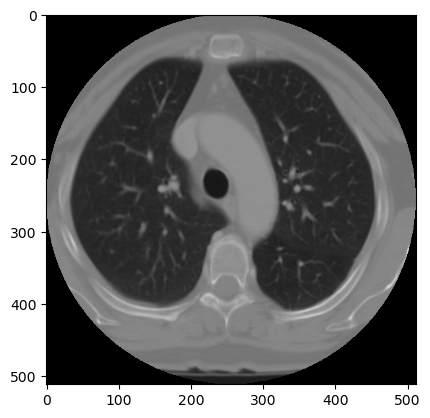

In [16]:
#Fonction pour la lecture de l'image. En entrée x le chemin vers l'image
read_hu = lambda x: imread(x).astype(np.float32)-32768 #We subtract 32768 from the pixel intensity to obtain the original Hounsfield unit (HU) values

#Affichage de l'image 000001_01_01_109.png
import matplotlib.image as img
c_img=read_hu(data.loc[0,'image_path'])
plt.imshow(c_img,cmap = 'gray',vmin=-1200,vmax=1200)
plt.show()

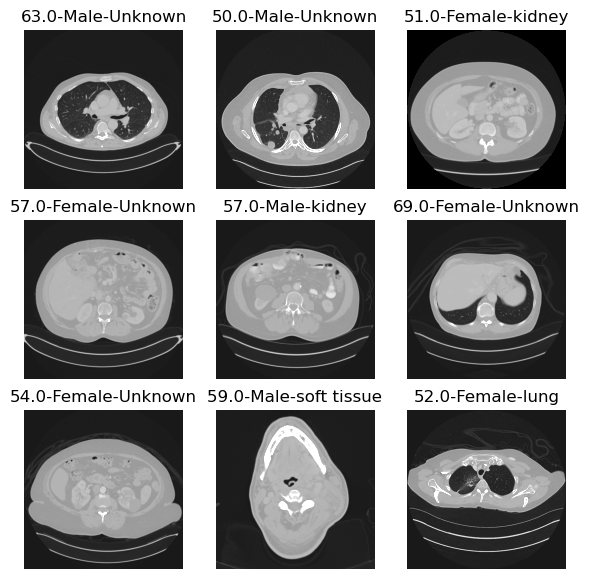

In [26]:
## Affichage des images

fig, axes = plt.subplots(3,3, figsize = (7, 7))
for c_ax, (index, data_row) in zip(axes.flatten(), data.sample(9).iterrows()):    
    c_img = read_hu(data_row['image_path'])
    c_ax.imshow(c_img, vmin = -1200, vmax = 600, cmap = 'gray')
    c_ax.set_title('{Patient_age}-{sex}-{lesion_type}'.format(**data_row))
    c_ax.axis('off')
plt.show()

__Affichage des images et des bounding boxes des lésions__

In [157]:
#Fonction permettant de créer le rectangle de la bounding box (bbox)
def create_boxes(in_row):
    box_list = []
    for (x0, y0, x1, y1) in in_row['bbox']:
        box_list += [Rectangle((x0, y0), 
                         np.abs(x1-x0),
                         np.abs(y1-y0)
                         )]
    return box_list

In [158]:
data['bbox_drawn']=create_boxes(data)

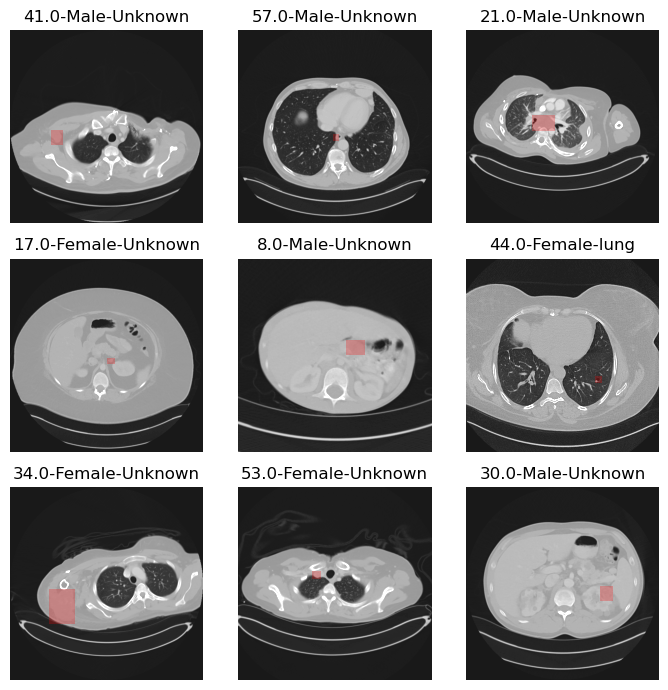

In [161]:
fig, axes = plt.subplots(3,3, figsize = (7, 7),tight_layout=True)
for c_ax, (index, data_row) in zip(axes.flatten(), data.sample(9).iterrows()):    
    c_img = read_hu(data_row['image_path'])
    c_ax.imshow(c_img, vmin = -1200, vmax = 600, cmap = 'gray')
    c_ax.add_collection(PatchCollection([data_row['bbox_drawn']], alpha = 0.25, facecolor = 'red'))#Ajout du patch de la bbox
    c_ax.set_title('{Patient_age}-{sex}-{lesion_type}'.format(**data_row))
    c_ax.axis('off')

plt.show()

__Affichage des images, bounding boxes et les diamétres RECIST des lésions (measurements_coordinates)__

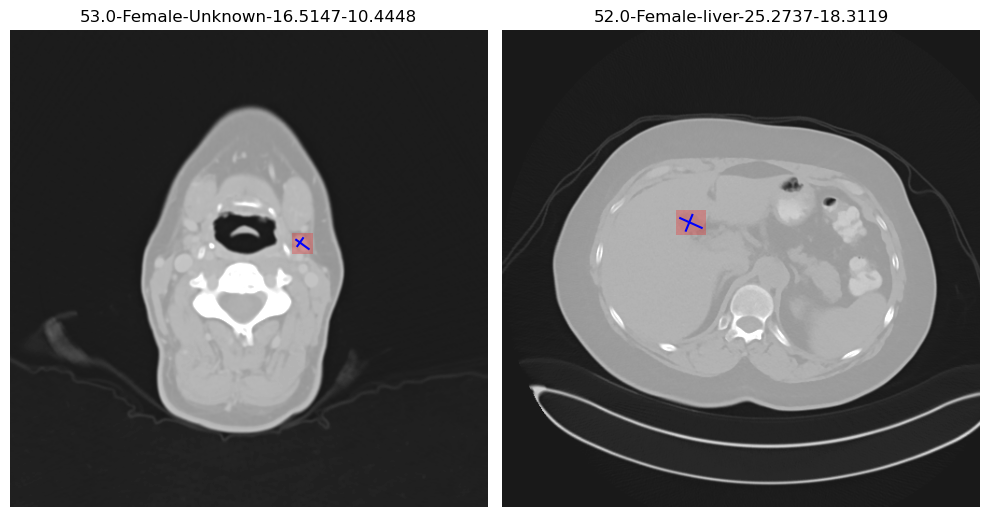

In [189]:
## Affichage des images, bounding boxes et les diamétres RECIST des lésions (measurements_coordinates)
fig, axes = plt.subplots(1,2, figsize = (10, 10),tight_layout=True)
for c_ax, (index, data_row) in zip(axes.flatten(), data.sample(2).iterrows()):    
    c_img = read_hu(data_row['image_path'])
    c_ax.imshow(c_img, vmin = -1200, vmax = 600, cmap = 'gray')
    c_ax.add_collection(PatchCollection([data_row['bbox_drawn']], alpha = 0.25, facecolor = 'red'))
    c_ax.set_title('{Patient_age}-{sex}-{lesion_type}-{diametre1}-{diametre2}'.format(**data_row))
    c_ax.axis('off')
    #Représente les deux diamètres des lésions
    c_ax.plot((data_row['mcoord'][0],data_row['mcoord'][2]),(data_row['mcoord'][1],data_row['mcoord'][3]),color="blue",markersize = 10)
    c_ax.plot((data_row['mcoord'][4],data_row['mcoord'][6]),(data_row['mcoord'][5],data_row['mcoord'][7]),color="blue",markersize = 10)
plt.show()

## 4 - Analyse des variables

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   File_name                   32735 non-null  object  
 1   Patient_index               32735 non-null  int64   
 2   Study_index                 32735 non-null  int64   
 3   Series_ID                   32735 non-null  int64   
 4   Key_slice_index             32735 non-null  int64   
 5   Measurement_coordinates     32735 non-null  object  
 6   Bounding_boxes              32735 non-null  object  
 7   Lesion_diameters_Pixel_     32735 non-null  object  
 8   Normalized_lesion_location  32735 non-null  object  
 9   Coarse_lesion_type          32735 non-null  int64   
 10  Possibly_noisy              32735 non-null  int64   
 11  Slice_range                 32735 non-null  object  
 12  Spacing_mm_px_              32735 non-null  object  
 13  Image_size      

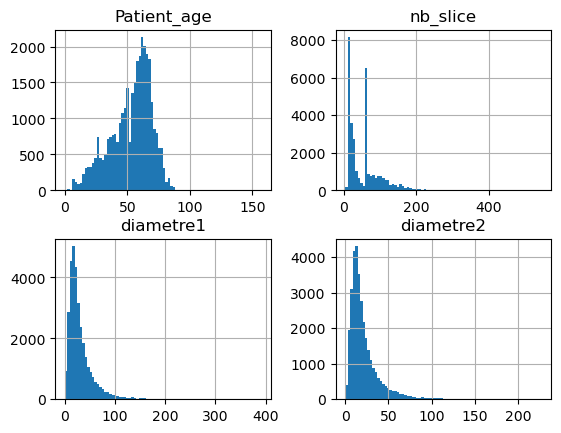

In [168]:
data.hist(['Patient_age','nb_slice','diametre1','diametre2'],bins=80)
plt.show()

In [21]:
data['nb_slice'].describe(include='all')

count    32735.000000
mean        56.627891
std         50.378786
min          4.000000
25%         17.000000
50%         45.000000
75%         73.000000
max        545.000000
Name: nb_slice, dtype: float64

In [ ]:
data.describe(include='all')

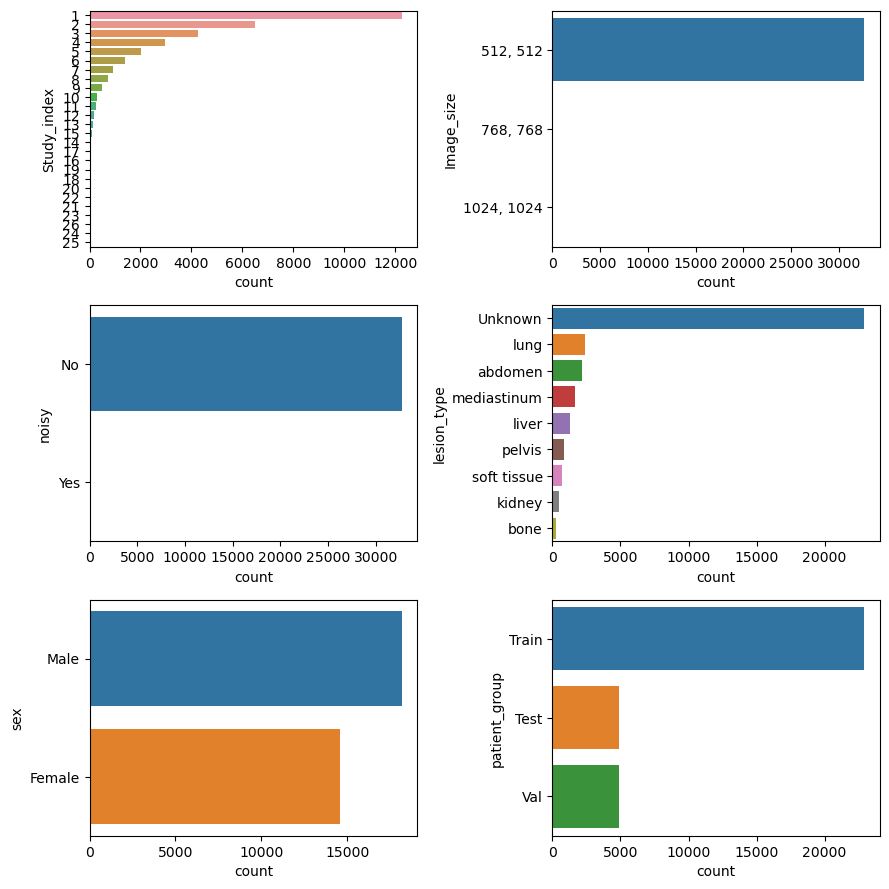

In [287]:
fig, axes = plt.subplots(3,2,figsize=(9,9)) 
columns = ['Study_index','Image_size','noisy','lesion_type','sex', 'patient_group']
for i,col in enumerate(list(columns)):
    plot = sns.countplot(y=col, data=data, ax=axes.flatten()[i],order = data[col].value_counts().index)
plt.tight_layout() 
plt.show()

In [23]:
data['lesion_type'].value_counts()

Unknown        22919
lung            2394
abdomen         2176
mediastinum     1672
liver           1284
pelvis           867
soft tissue      681
kidney           495
bone             247
Name: lesion_type, dtype: int64

In [38]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

## Liver Lung Mediastinum

In [169]:
data_llm=data[(data['lesion_type']=='lung') | (data['lesion_type']=='liver') | (data['lesion_type']=='mediastinum') ]

In [170]:
data_llm.shape[0]

5350

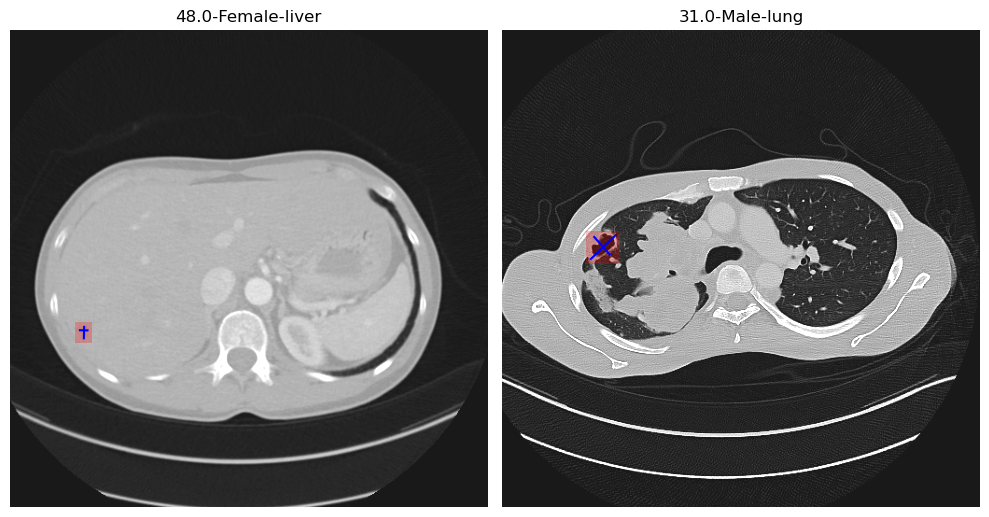

In [171]:
## Affichage des images, bounding boxes et les diamétres RECIST des lésions (measurements_coordinates)
fig, axes = plt.subplots(1,2, figsize = (10, 10),tight_layout=True)
for c_ax, (index, data_row) in zip(axes.flatten(), data_llm.sample(2).iterrows()):    
    c_img = read_hu(data_row['image_path'])
    c_ax.imshow(c_img, vmin = -1200, vmax = 600, cmap = 'gray')
    c_ax.add_collection(PatchCollection([data_row['bbox_drawn']], alpha = 0.25, facecolor = 'red'))
    c_ax.set_title('{Patient_age}-{sex}-{lesion_type}'.format(**data_row))
    c_ax.axis('off')
    #Représente les deux diamètres des lésions
    c_ax.plot((data_row['mcoord'][0],data_row['mcoord'][2]),(data_row['mcoord'][1],data_row['mcoord'][3]),color="blue",markersize = 10)
    c_ax.plot((data_row['mcoord'][4],data_row['mcoord'][6]),(data_row['mcoord'][5],data_row['mcoord'][7]),color="blue",markersize = 10)
plt.show()

In [134]:
data_llm['lesion_type'].cat.remove_unused_categories(True)

C:\Users\omraamolivier\Anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


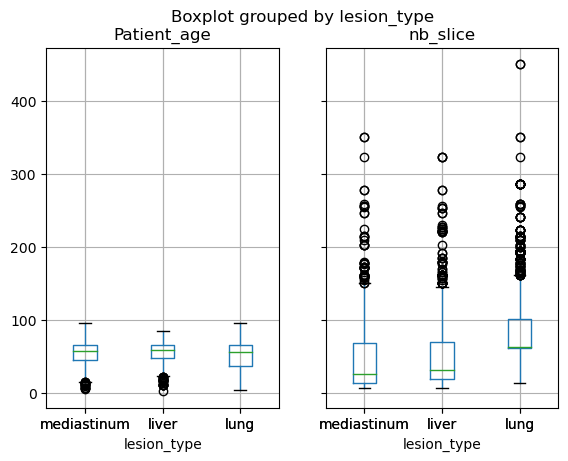

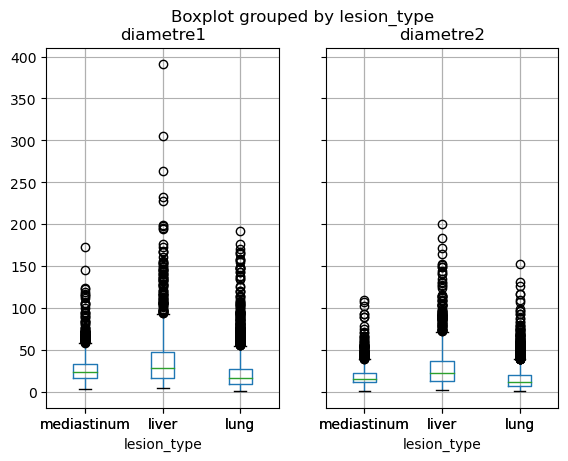

In [137]:
data_llm[['Patient_age','nb_slice']].describe(include='all')
data_llm.boxplot(['Patient_age','nb_slice'],by='lesion_type')
data_llm.boxplot(['diametre1','diametre2'],by='lesion_type')
plt.show()

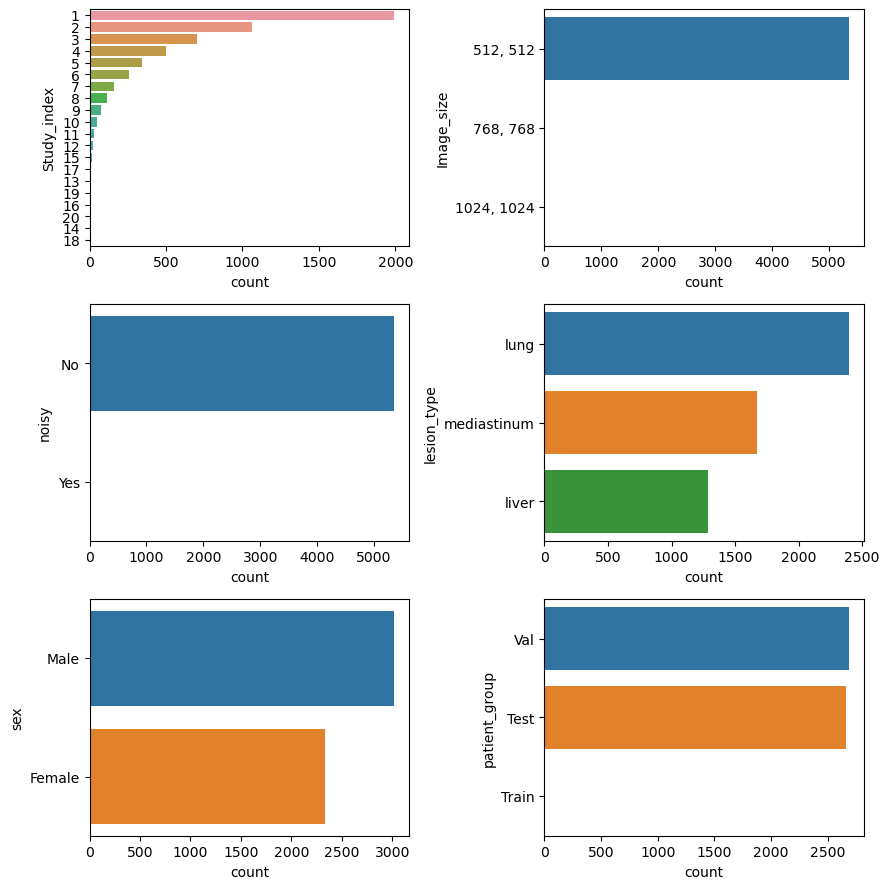

In [69]:
fig, axes = plt.subplots(3,2,figsize=(9,9)) 
columns = ['Study_index','Image_size','noisy','lesion_type','sex', 'patient_group']
for i,col in enumerate(list(columns)):
    plot = sns.countplot(y=col, data=data_llm,ax=axes.flatten()[i],order = data_llm[col].value_counts().index)
plt.tight_layout() 
plt.show()